## NATURAL LANGUAGE PROCSSING (NLP)

In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv("Sentiment_dataset.csv")

#### Quick check

In [3]:
df.shape

(732, 15)

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
# Basic Cleaning Function
# Removing URLs, mentions, hashtags, punctuation, numbers, and extra spaces

def clean_text(text):
    # Converting to string just in case
    text = str(text)
    # Lowercase
    text = text.lower()
    # Removing URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Removing mentions (@user)
    text = re.sub(r"@\w+", "", text)
    # Removing hashtags but keep the word
    text = text.replace("#", "")
    # Removing punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # RemovinRemoving numbers
    text = re.sub(r"\d+", "", text)
    # Removing extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["Text"].apply(clean_text)
print(df[["Text","clean_text"]].head())

                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                                   clean_text  
0        enjoying a beautiful day at the park  
1           traffic was terrible this morning  
2          just finished an amazing workout 💪  
3  excited about the upcoming weekend getaway  
4  trying out a new recipe for dinner tonight  


In [7]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Tokenization + Stopwords Removal + Lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download missing resources
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_tokens(text):
    tokens = word_tokenize(text)  # tokenize
    tokens = [t for t in tokens if t.isalpha()]  # keep only words
    tokens = [t for t in tokens if t not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # lemmatize
    return " ".join(tokens)

df["final_text"] = df["clean_text"].apply(preprocess_tokens)
print(df[["Text", "final_text"]].head())


[nltk_data] Downloading package punkt to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Awuni
[nltk_data]     Bismark\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                         final_text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2          finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


In [9]:
# Turning text into numbers your model can understand.
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X = vectorizer.fit_transform(df["final_text"])
y = df["Sentiment"]   # target labels


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
print(y.value_counts())


Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64


In [12]:
# Example sentiment mapping
positive_words = ["positive", "joy", "excitement", "happy", "vibrancy", "mesmerizing", "thrilling journey", "winter magic", "culinary adventure"]
negative_words = ["negative", "sad", "angry", "boring", "frustrating", "disappointing", "horrible", "worst"]
neutral_words  = ["neutral", "okay", "fine", "average", "normal"]

def map_sentiment(label):
    label = str(label).lower()
    if any(word in label for word in positive_words):
        return "Positive"
    elif any(word in label for word in negative_words):
        return "Negative"
    elif any(word in label for word in neutral_words):
        return "Neutral"
    else:
        return "Neutral"   # default fallback

df["Mapped_Sentiment"] = df["Sentiment"].apply(map_sentiment)
print(df["Mapped_Sentiment"].value_counts())


Mapped_Sentiment
Neutral     565
Positive    152
Negative     15
Name: count, dtype: int64


In [13]:
y = df["Mapped_Sentiment"]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


Mapped_Sentiment
Neutral     565
Positive    152
Negative     15
Name: count, dtype: int64


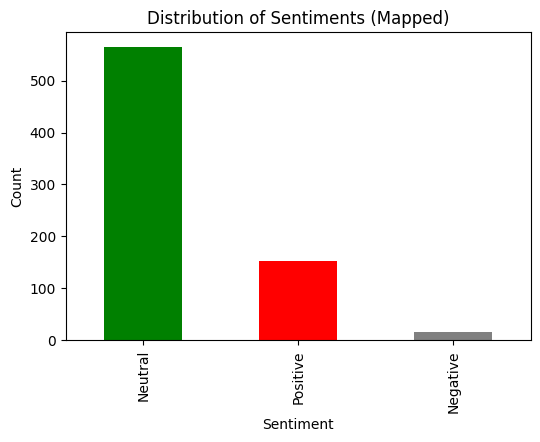

In [15]:
# Counting the new mapped labels
sent_counts = df["Mapped_Sentiment"].value_counts()

# Printing counts
print(sent_counts)

# Plot
plt.figure(figsize=(6,4))
sent_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Distribution of Sentiments (Mapped)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [17]:
# Splitting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 585
Test size: 147


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initializing Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Training on training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Predicting on test data
y_pred = log_reg.predict(X_test)

In [21]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.77      1.00      0.87       113
    Positive       1.00      0.03      0.06        31

    accuracy                           0.78       147
   macro avg       0.59      0.34      0.31       147
weighted avg       0.81      0.78      0.68       147



C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

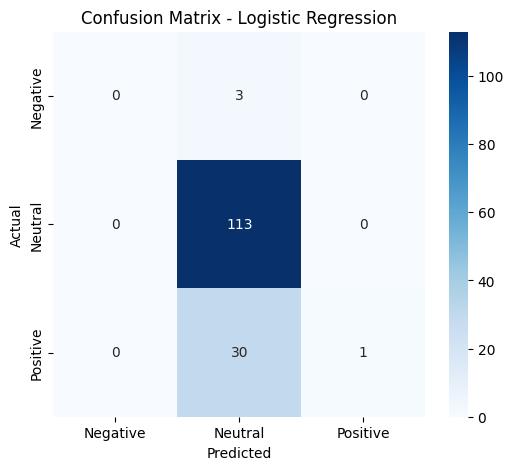

In [22]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
# Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.77      1.00      0.87       113
    Positive       1.00      0.03      0.06        31

    accuracy                           0.78       147
   macro avg       0.59      0.34      0.31       147
weighted avg       0.81      0.78      0.68       147



C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

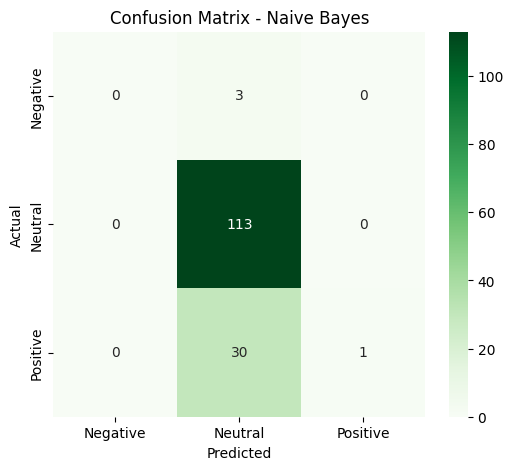

In [24]:
# Computing confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens",
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Model comparison

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression scores
log_reg_prec = precision_score(y_test, y_pred, average="weighted")
log_reg_rec = recall_score(y_test, y_pred, average="weighted")
log_reg_f1 = f1_score(y_test, y_pred, average="weighted")

# Naive Bayes scores
nb_prec = precision_score(y_test, y_pred_nb, average="weighted")
nb_rec = recall_score(y_test, y_pred_nb, average="weighted")
nb_f1 = f1_score(y_test, y_pred_nb, average="weighted")

# Print comparison
print("Model Comparison (Weighted Averages):")
print(f"Logistic Regression - Precision: {log_reg_prec:.3f}, Recall: {log_reg_rec:.3f}, F1: {log_reg_f1:.3f}")
print(f"Naive Bayes         - Precision: {nb_prec:.3f}, Recall: {nb_rec:.3f}, F1: {nb_f1:.3f}")


Model Comparison (Weighted Averages):
Logistic Regression - Precision: 0.806, Recall: 0.776, F1: 0.684
Naive Bayes         - Precision: 0.806, Recall: 0.776, F1: 0.684


C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
